In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv('/content/city_hour.csv')

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [ ]:
data = data.dropna()

In [ ]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000,129277.000000
mean,63.920899,128.279759,18.108749,32.815853,34.225690,21.820122,1.030950,11.281448,36.352084,3.912114,11.344988,2.566608,145.405873
std,62.152594,99.378185,28.985743,23.036079,35.307825,18.102877,1.572615,10.353600,27.687567,5.858445,15.042199,5.346189,97.011021
min,0.030000,1.000000,0.010000,0.100000,0.000000,0.010000,0.000000,0.010000,0.020000,0.000000,0.000000,0.000000,18.000000
25%,27.000000,63.750000,3.560000,15.420000,13.410000,10.320000,0.430000,5.500000,16.770000,0.940000,2.350000,0.220000,79.000000
50%,47.500000,101.500000,8.240000,27.200000,22.970000,15.350000,0.700000,8.830000,28.220000,2.250000,6.200000,1.000000,114.000000
75%,76.500000,157.400000,17.820000,44.100000,40.180000,29.560000,1.070000,13.600000,48.600000,4.560000,13.940000,2.690000,176.000000
max,999.990000,1000.000000,419.780000,266.730000,408.250000,485.520000,31.620000,199.930000,219.780000,120.080000,198.050000,261.950000,760.000000


In [ ]:
sns.pairplot(data)
plt.show()

<ipython-input-25-b5a4aa4d6645>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


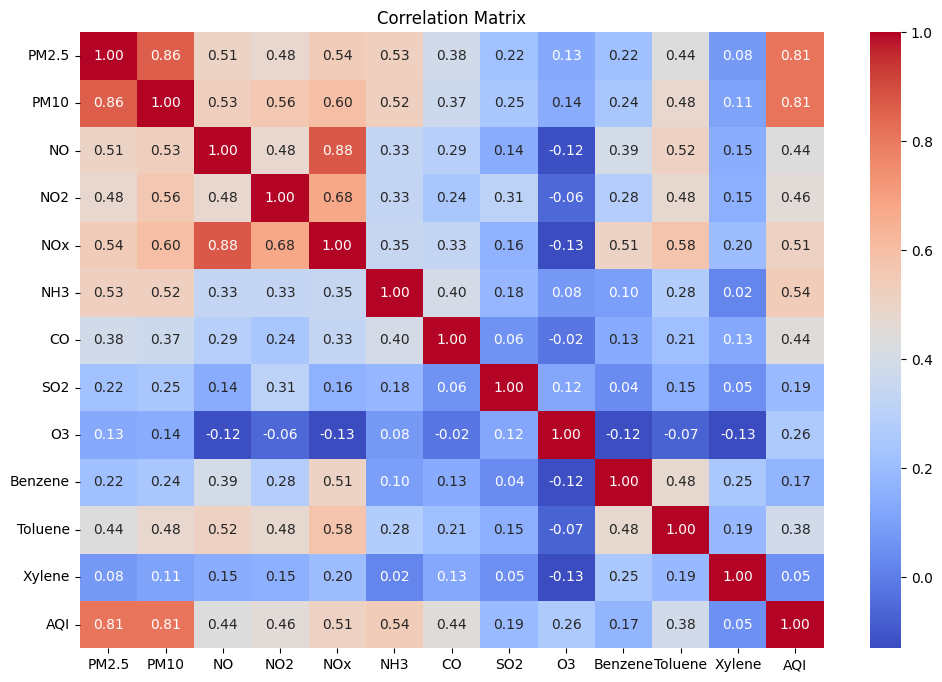

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
X = data[['CO', 'SO2', 'NH3']]  # Features
y = data['AQI']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestRegressor()

In [ ]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 4124.056914952508
Mean Absolute Error: 45.691281331955736
R-squared: 0.5700014767047494


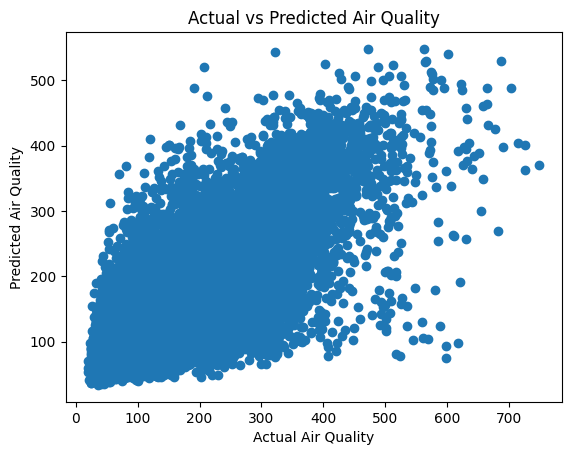

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Air Quality")
plt.ylabel("Predicted Air Quality")
plt.title("Actual vs Predicted Air Quality")
plt.show()

In [ ]:
feature_importances = model.feature_importances_
print("Feature Importances:")
print(list(zip(X.columns, feature_importances)))

Feature Importances:
[('CO', 0.4485906498476262), ('SO2', 0.18339103272302587), ('NH3', 0.36801831742934793)]


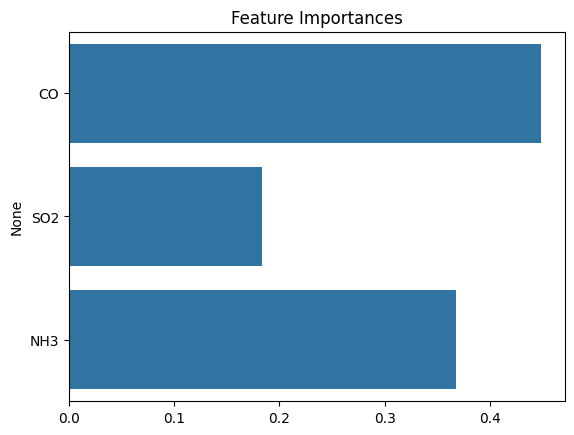

In [ ]:
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importances")
plt.show()